<a href="https://colab.research.google.com/github/Deepti2802/Machine-learning-2/blob/main/Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
data = pd .read_csv('/content/Fraud.csv')

In [ ]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [ ]:
data.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0


In [ ]:
data.shape

(6362620, 11)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [ ]:
data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [ ]:
data = data.dropna()

In [ ]:
data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [ ]:
data.drop(labels=['nameOrig','nameDest'] ,axis=1  , inplace = True)

In [ ]:
data.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0,0
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,0
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,1,0
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0,0


In [ ]:
data.rename(columns={'newbalanceOrig':'newbalanceOrg'} , inplace=True)

In [ ]:
data.head()

,step,type,amount,oldbalanceOrg,newbalanceOrg,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0,0
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,0
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,1,0
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0,0


to check the mininmum values of old/new  ,org/dest

In [ ]:
print('minimum valueof amount,old/new balamce of Org/Dest:')
data[['amount','oldbalanceOrg','newbalanceOrg','oldbalanceDest','newbalanceDest']].min()

minimum valueof amount,old/new balamce of Org/Dest:


amount            0.0
oldbalanceOrg     0.0
newbalanceOrg     0.0
oldbalanceDest    0.0
newbalanceDest    0.0
dtype: float64

to check the maximum values of old/new ,org/dest



In [ ]:
print('maximum valueof amount,old/new balamce of Org/Dest:')
data[['amount','oldbalanceOrg','newbalanceOrg','oldbalanceDest','newbalanceDest']].max()

maximum valueof amount,old/new balamce of Org/Dest:


amount            9.244552e+07
oldbalanceOrg     5.958504e+07
newbalanceOrg     4.958504e+07
oldbalanceDest    3.560159e+08
newbalanceDest    3.561793e+08
dtype: float64

Data Analysis 


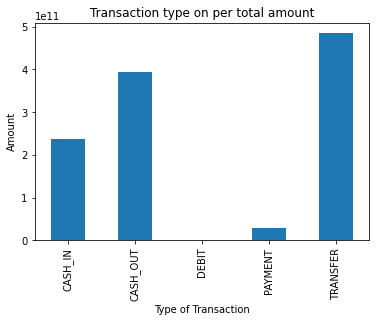

In [ ]:
var = data.groupby('type').amount.sum()
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
var.plot(kind ='bar')
ax1.set_title('Transaction type on per total amount')
ax1.set_xlabel('Type of Transaction')
ax1.set_ylabel('Amount');

In [ ]:
data.loc[data.isFraud	== 1].type.unique()

array(['TRANSFER', 'CASH_OUT'], dtype=object)

this shows that 'Transfer' and 'Cash_Out ' where Fraud happen


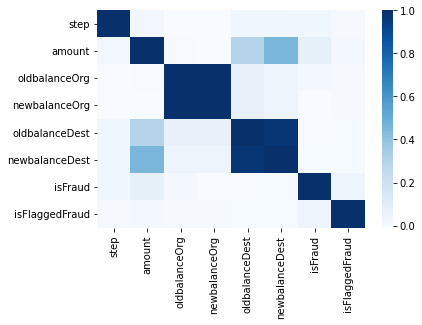

In [ ]:
sns.heatmap(data.corr(),cmap='Blues')

this show the 'oldbalanceOrg,	newbalanceOrg,oldbalanceDest,	newbalanceDest' are highly coorelated

In [ ]:
legit = data[data.isFraud == 0]
fraud = data[data.isFraud == 1]

In [ ]:
print(legit.shape)
print(fraud.shape)

(6354407, 9)
(8213, 9)


In [ ]:
legit.describe()

,step,amount,oldbalanceOrg,newbalanceOrg,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.354407e+06,6.354407e+06,6.354407e+06,6.354407e+06,6.354407e+06,6.354407e+06,6354407.0,6354407.0
mean,2.432357e+02,1.781970e+05,8.328287e+05,8.559702e+05,1.101421e+06,1.224926e+06,0.0,0.0
std,1.421402e+02,5.962370e+05,2.887144e+06,2.924987e+06,3.399202e+06,3.673816e+06,0.0,0.0
min,1.000000e+00,1.000000e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0
25%,1.560000e+02,1.336840e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0
50%,2.390000e+02,7.468472e+04,1.406900e+04,0.000000e+00,1.333118e+05,2.148817e+05,0.0,0.0
75%,3.340000e+02,2.083648e+05,1.069695e+05,1.447307e+05,9.441446e+05,1.111975e+06,0.0,0.0
max,7.180000e+02,9.244552e+07,4.381886e+07,4.368662e+07,3.560159e+08,3.561793e+08,0.0,0.0


In [ ]:
fraud.describe()

,step,amount,oldbalanceOrg,newbalanceOrg,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,8213.000000,8.213000e+03,8.213000e+03,8.213000e+03,8.213000e+03,8.213000e+03,8213.0,8213.000000
mean,368.413856,1.467967e+06,1.649668e+06,1.923926e+05,5.442496e+05,1.279708e+06,1.0,0.001948
std,216.388690,2.404253e+06,3.547719e+06,1.965666e+06,3.336421e+06,3.908817e+06,0.0,0.044097
min,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.0,0.000000
25%,181.000000,1.270913e+05,1.258224e+05,0.000000e+00,0.000000e+00,0.000000e+00,1.0,0.000000
50%,367.000000,4.414234e+05,4.389835e+05,0.000000e+00,0.000000e+00,4.676420e+03,1.0,0.000000
75%,558.000000,1.517771e+06,1.517771e+06,0.000000e+00,1.478287e+05,1.058725e+06,1.0,0.000000
max,743.000000,1.000000e+07,5.958504e+07,4.958504e+07,2.362305e+08,2.367265e+08,1.0,1.000000


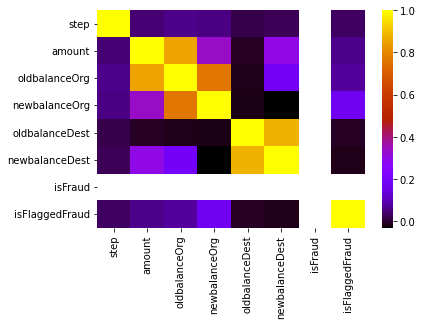

In [ ]:
sns.heatmap(fraud.corr(),cmap ='gnuplot')

In [ ]:
print('the total number of fraud transaction is {}.'.format(data.isFraud.sum()))

the total number of fraud transaction is 8213.


In [ ]:
print ('the total number of fraud transaction which is marked as fraud{}.'.format(data.isFlaggedFraud.sum()))

the total number of fraud transaction which is marked as fraud16.


In [ ]:
print('ratio of fraud transaction vs non-fraud transaction is 1:{}.'.format(int(legitcount//fraudcount)))

ratio of fraud transaction vs non-fraud transaction is 1:2183.


In [ ]:
print('Amount lost due to these fraud transaction is ${}.',format(int(fraud.amount.sum())))

Amount lost due to these fraud transaction is ${}. 12056415427


Data Exploration

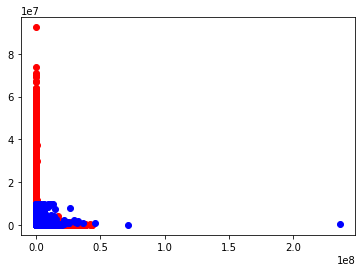

In [ ]:
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1) 
ax1.scatter(legit['oldbalanceOrg'],legit['amount'],c='r')
ax1.scatter(fraud['oldbalanceDest'],fraud['amount'],c='b')
plt.show()


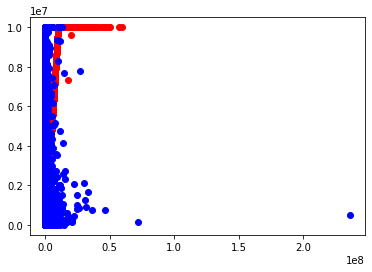

In [ ]:
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1) 
ax1.scatter(fraud['oldbalanceOrg'],fraud['amount'],c='r')
ax1.scatter(fraud['oldbalanceDest'],fraud['amount'],c='b')
plt.show()


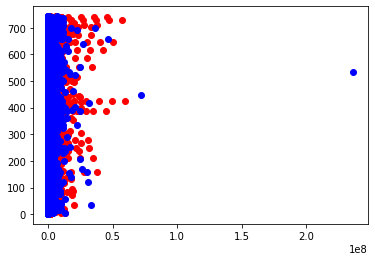

In [ ]:
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1) 
ax1.scatter(fraud['oldbalanceOrg'],fraud['step'],c='r')
ax1.scatter(fraud['oldbalanceDest'],fraud['step'],c='b')
plt.show()


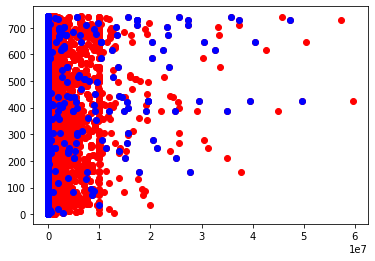

In [ ]:
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1) 
ax1.scatter(fraud['oldbalanceOrg'],fraud['step'],c='r')
ax1.scatter(fraud['newbalanceOrg'],fraud['step'],c='b')
plt.show()


In [ ]:
data_new = data.replace(to_replace={'PAYMENT':1,'TRANSFER':2,'CASH_OUT':3,'DEBIT':4,'CASH_IN':5,'No':0,'Yes':1,})

In [ ]:
data_new.head()

,step,type,amount,oldbalanceOrg,newbalanceOrg,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,1,9839.64,170136.0,160296.36,0.0,0.0,0,0
1,1,1,1864.28,21249.0,19384.72,0.0,0.0,0,0
2,1,2,181.00,181.0,0.00,0.0,0.0,1,0
3,1,3,181.00,181.0,0.00,21182.0,0.0,1,0
4,1,1,11668.14,41554.0,29885.86,0.0,0.0,0,0


In [ ]:
data_new.drop(labels=['isFlaggedFraud'] ,axis=1  , inplace = True)

In [ ]:
data_new.head()

,step,type,amount,oldbalanceOrg,newbalanceOrg,oldbalanceDest,newbalanceDest,isFraud
0,1,1,9839.64,170136.0,160296.36,0.0,0.0,0
1,1,1,1864.28,21249.0,19384.72,0.0,0.0,0
2,1,2,181.00,181.0,0.00,0.0,0.0,1
3,1,3,181.00,181.0,0.00,21182.0,0.0,1
4,1,1,11668.14,41554.0,29885.86,0.0,0.0,0


Splitting the data into Features & Targets

In [ ]:
x = data_new.drop(columns='isFraud',axis=1)
y = data_new['isFraud']

In [ ]:
print(x)

         step  type      amount  oldbalanceOrg  newbalanceOrg  oldbalanceDest  \
0           1     1     9839.64      170136.00      160296.36            0.00   
1           1     1     1864.28       21249.00       19384.72            0.00   
2           1     2      181.00         181.00           0.00            0.00   
3           1     3      181.00         181.00           0.00        21182.00   
4           1     1    11668.14       41554.00       29885.86            0.00   
...       ...   ...         ...            ...            ...             ...   
6362615   743     3   339682.13      339682.13           0.00            0.00   
6362616   743     2  6311409.28     6311409.28           0.00            0.00   
6362617   743     3  6311409.28     6311409.28           0.00        68488.84   
6362618   743     2   850002.52      850002.52           0.00            0.00   
6362619   743     3   850002.52      850002.52           0.00      6510099.11   

         newbalanceDest  
0

In [ ]:
print(y)

0          0
1          0
2          1
3          1
4          0
          ..
6362615    1
6362616    1
6362617    1
6362618    1
6362619    1
Name: isFraud, Length: 6362620, dtype: int64


Split the data into Training data and Testing Data

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train ,x_test ,y_train, y_test = train_test_split(x,y,test_size=0.2,stratify=y,random_state=2)

In [ ]:
print(x.shape,x_train.shape,x_test.shape)

(6362620, 7) (5090096, 7) (1272524, 7)


Model Training

In [ ]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 10 decision trees
rf = RandomForestRegressor(n_estimators = 10, random_state = 42)


In [ ]:
if True:
   probabilities = rf.fit(x_train,y_train.values.ravel()).predict(x_test)

In [ ]:
from sklearn.metrics import average_precision_score
if True:
   print(average_precision_score(y_test,probabilities))

0.9468707705899837


Machine learning can be used for detection of fraud transaction

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
model = LogisticRegression()

In [ ]:
#training the Logistic Regression Model with Training Data
model.fit(x_train,y_train)

LogisticRegression()

In [ ]:
#accuracy on training data
x_train_predition = model.predict(x_train)
training_data_accuracy = accuracy_score(x_train_predition,y_train)

In [ ]:
print('Accuracy on Training data:',training_data_accuracy)

Accuracy on Training data: 0.9982886373852281


In [ ]:
#accuracy on test data
x_test_predition = model.predict(x_test)
test_data_accuracy = accuracy_score(x_test_predition,y_test)

In [ ]:
print('Accuracy on Test data:',test_data_accuracy)

Accuracy on Test data: 0.9982735099691636
